# Character encryption
Last update: 6 Jan 2020  

Notes:   
see https://docs.google.com/document/d/1CIDE1twSB2hjM_j_PUvHKPQ5jwaRcgzDzhN1Yb4YVnE/edit  for new edits. 
For now references at the end of each section.   
section hyper links seem to work when exported to HTML, but references don't    

## Abstract
This paper documents an educational coding project that implements a cipher based on a two round Feistel structure and operates on characters instead of bits.  The character set is the English alphabet consisting of 26 letters, A to Z; all other characters and spaces are removed before processing.      

## 1) Introduction
The purpose of the paper is to document a coding project that implements a character based encryption scheme.  This is an educational project for exploring aspects of the Feistel structure.  The code developed here is not intended to implement a secure encryption scheme, only to explore and document some interesting aspects of encryption.  The code will take as plain text input, blocks of text consisting of characters A to Z, and output ciphertext blocks, also consisting of characters A to Z.  The code will strip any non-alpha characters from the input text before encipherment.  

Encryption is the process of encoding information so that converts the original of the information, known as plaintext into into an alternative form known as ciphertext.  The ciphertext is what is transmitted to prevent third parties or the public from reading private messages <span id="a1">[[1]](#f1)</span>.  

In December 2020, the Zodiac cipher, Z340, was solved after more than 51 years and a very interesting YouTube video on the solution was published <span id="a2">[[2]](#f2)</span>.  The solution to solving the cypher was a combination of brute force and hill climbing.  The cypher was meant to be eventually decoded, otherwise why would the Zodiac send it?  But the cypher turned out to be very difficult and the solution involved lots of computer time employing random trials.  As bits of the message were uncovered, these were used as clues to help solve the remaining message.  

Zodiac’s first cypher was solved on August 8, 1969, by Donald and Betty Harden of Salinas, California. David Oranchak has a very interesting video on the history and solution of this cipher <span id="a3">[[3]](#f3)</span>. The first cipher, given the name, Z408, since there were 408 characters in the message.  The cipher was divided into three parts and each part wassent to a different news paper.  Each part of the cipher had 17 columns and 8 rows of symbols for a total of 408 symbols.  54 different symboles were used in the message.  The key for the solved cipher had some letters encoded by different symbols, which is called subsitution with suppression of frequencies.  Since individual letter frequencies were supressed, Donald and Betty focused on double symbols in the cipher and they look for a four letter pattern that would fit the word KILL.  Eventyually they solved the Z340 cipher and sent their solution into the news paper, who passed the solution onto the police.
  
<img src='Zodiac Z408 key.png' width="200"/>   
Figure 1: The solution key to the Z408 cipher. (think about redrawing the key)  

The second cypher, Z340, was 340 symbols long with 63 different symbols.  Both the Z408 and the Z340 ciphers were extinsivally studied with the thought that some clues from the Z408 solution could be used to solve the Z340 cipher.  Eventually, by trial and error, it was suspected that the symbols in the Z340 cipher might be interleaved somehow. David Oranchak's video on the Z340 describes the solution to the cipher.     
  
<img src='Zodiac Z340 key.png' width="600"/>  
Figure 2: The solution key to the Z340 cipher. (think about redrawing the key)  

The Zodiac wanted the Z340 to be harder to decode, but did he suspect that it would remain unread for so long?  

There are other well know examples of ciphers that operate on characters.  The Playfair[] and the German Enigma[] are examples of character based cyphers.  These ciphers were used prior to the modern computer era.  

The Playfair cipher is encrypts pairs of letters and is harder to break than simple substitution ciphers.  This is because frequency analysis does not work with this cipher.  Breaking the cipher by hand required a lot of work, however, by using modern computers and using a shotgun hill climbing method, the cipher can be broken quickely [].  

Wikipedia contributors. (2020, December 17). Playfair cipher. In Wikipedia, The Free Encyclopedia. Retrieved 01:46, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Playfair_cipher&oldid=994771341


The German Enigma is a cipher that uses a typewriter based machine to encode and decode the messages [].  Each press of the keyboard causes the machine state to advance and implement a polyalphabetic substitution cipher.  Polish, British and eventually Americam criptogeraphers spent concerderable effort during World War II to break the German Enigma.   
Wikipedia contributors. (2021, January 7). Enigma machine. In Wikipedia, The Free Encyclopedia. Retrieved 14:51, January 12, 2021, from https://en.wikipedia.org/w/index.php?title=Enigma_machine&oldid=998787365 

Watching David Oranchak's video on the solution of the Z340 got me interested in looking at cyphers.  In this programming project, we are not going to invent a new cipher.  We are going to use the well known Feistel network and use some ideas from the Data Encryption Standard [] [] that operates on characters as opposed to binary data.  

Wikipedia contributors. (2021, January 8). Feistel cipher. In Wikipedia, The Free Encyclopedia. Retrieved 14:52, January 12, 2021, from https://en.wikipedia.org/w/index.php?title=Feistel_cipher&oldid=999120196

Wikipedia contributors. (2020, December 25). Data Encryption Standard. In Wikipedia, The Free Encyclopedia. Retrieved 15:02, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Data_Encryption_Standard&oldid=996197167

The goal of this programming project is to design a character based cipher that is non-trival to break. A character based cypher based on two rounds of a Feistel network could be such a cipher.  It would not be secure by present day standards, therefore could present a strong puzzle to someone who likes such challenges. However, I think a single encrypted message would be almost impossible to break, if both the key and algorthium were secret.  

The Feistel network is a data flow map which can be used to construct a block cipher[].  The cipher structer is named after the German-born physicist and cryptographer Horst Feistel who did pioneering research while working for IBM and several well known ciphers use the Feistel network.  In most implementations binary data is processed as bits, but in this project, characters will be processed as the unit8 type data.  The figure below shows the Feistel network.

Wikipedia contributors. (2021, January 5). Block cipher. In Wikipedia, The Free Encyclopedia. Retrieved 15:04, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Block_cipher&oldid=998461268

<img src='File_Feistel_cipher_diagram.png' width="300"/>  
Figure 3: Feistel cipher diagram (redraw to include only one round)   

The input data is divided into blocks, which are divided into half blocks, Left and Right.  The Right half block is passed through the function F(), called the Feistel function, and then XOR'ed with the Left half block.  As shown Figure, there is an additional application of the XOR and F().  The Left and Right out puts when combined is the encrypted data block.  The Feistel network is invertible, even if the round function is not itself invertible.


**Contents**  
2. [Preliminaries](#section2)
3. [Design](#section3)
4. [Test message](#section4)
5. [Cryptanalysis](#section5)
6. [Conclusion](#section6)
7. [References](#section7)

The following python libraries are used in this project.   
- Collections: a python module that supplies different types of containers for access and iteration
- Counter: used to keep the count of the elements in an iterable in the form of an unordered dictionary
- itertools: a python module that provids functions that work on iterators
- NumPy: a python library used for working with arrays
- Matplotlib: a library for creating graphs and plots  


1. <span id="f1"></span>Wikipedia contributors. (2021, January 11). Encryption. In Wikipedia, The Free Encyclopedia. Retrieved 17:22, January 12, 2021, from https://en.wikipedia.org/w/index.php?title=Encryption&oldid=999691356 [$\hookleftarrow$](#a1)   
2. <span id="f2"></span>David Oranchak, "Let's Crack Zodiac - Episode 5 - The 340 Is Solved!", Dec 11, 2020, https://www.youtube.com/watch?v=-1oQLPRE21o&t=283s [$\hookleftarrow$](#a2) 
3. <span id="f3"></span>David Oranchak, "Let's Crack Zodiac - Episode 3 - The 408", Sep 1, 2020, https://www.youtube.com/watch?v=57o8g3d6lSw [$\hookleftarrow$](#a3)

In [171]:
from collections import Counter
import itertools
import numpy as np
import matplotlib.pyplot as plt

## 2) Preliminaries <a id="section2"></a>
This section of the paper will cover some preliminary topics that are required for the operation of the cipher.  Since this paper also contain python code, there are variables, functions and data that need to be declared first.  These are describe in greater detail in the various subsections.  

The block size in this implementation is 16 characters long and the total character count is padded to bring the total length of the message to a multiple of the block size.  

- 2.a) [Test message and statics](#section2a)
- 2.b) [Character encoding for processing](#section2b)  
- 2.c) [Key generation](#section2c)
- 2.d) [Character XOR](#section2d)
- 2.e) [S-box](#section2e)
- 2.f) [Mixer matrix](#section2f)
- 2.g) [P-table](#section2g)
- 2.h) [Feistel function](#section2h)


### 2.a) Test message and statics <a id="section2a"></a>
The test message used for this project is the English translation of the first chapter from Julius Caesar's account of the Gallic Wars <span id="a4">[[4]](#f4)</span> <span id="a5">[[5]](#f5)</span>.  In Latin, it begins with "Gallia est omnis divisa in partes tres", meaning "All Gaul is divided into three parts".  After the text file is read into memory, all the non-letter characters (numbers, spaces and puncuation) are removed and all letters are converted to upper case.  Then the message is padded to make the length equal to an even multiple of the block length. The test message then consists of list of upper case letters without space between the words.

All the spaces and puctutation are removed to reduce the message to just the essential elements.  Upper case was used to make the message look more crypto like.    

Chapter 1 of Caesar's Gallic Wars was chosed as the test message as a nod to the cipher named after him.  A simple subsition cipher is sometimes called a Caesar cipher.  Each letter in the plaintext is replaced by a letter some fixed number of positions down the alphabet <span id="a6">[[6]](#f6)</span>.

The following code reads in the test message and does the conversion and padding as described.

 
4. <span id="f4"></span> Wikipedia contributors. (2021, January 8). Gallic Wars. In Wikipedia, The Free Encyclopedia. Retrieved 02:10, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Gallic_Wars&oldid=999164488 [$\hookleftarrow$](#a4)
5. <span id="f5"></span> Wikipedia contributors. (2021, January 8). Commentarii de Bello Gallico. In Wikipedia, The Free Encyclopedia. Retrieved 02:11, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Commentarii_de_Bello_Gallico&oldid=999035314 [$\hookleftarrow$](#a5)
6. <span id="f6"></span> Wikipedia contributors. (2020, December 18). Caesar cipher. In Wikipedia, The Free Encyclopedia. Retrieved 02:11, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Caesar_cipher&oldid=994975077 [$\hookleftarrow$](#a6)

In [172]:
# open the test message
message = open('Commentarii_de_Bello_Gallico.txt', 'r').read()

In [173]:
# print the test message
string = message
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

All Gaul is divided into three parts, one of which the Belgae inhabit, the 
Aquitani another, those who in their own language are called Celts, in our 
Gauls, the third. All these differ from each other in language, customs and
 laws. The river Garonne separates the Gauls from the Aquitani; the Marne a
nd the Seine separate them from the Belgae. Of all these, the Belgae are th
e bravest, because they are furthest from the civilization and refinement o
f our Province, and merchants least frequently resort to them, and import t
hose things which tend to effeminate the mind; and they are the nearest to 
the Germans, who dwell beyond the Rhine, with whom they are continually wag
ing war; for which reason the Helvetii also surpass the rest of the Gauls i
n valor, as they contend with the Germans in almost daily battles, when the
y either repel them from their own territories, or themselves wage war on t
heir frontiers. One part of these, which it has been said that the Gauls oc
cupy, takes 

In [174]:
# remove non-letter characters and convert to upper case
PT = ''.join(e for e in message if e.isalpha()).upper()

In [175]:
# pad the message size to get to even multiple of the block size
block_size = 16  # must be an even number
pad_size = block_size - (len(PT) % block_size)
if pad_size == block_size:
    pad_size = 0
print('number of characters to padd the message: ',pad_size)

number of characters to padd the message:  2


In [176]:
padding = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'  # this could also be from a set of random characters unique to each message
PT = PT + padding[0:pad_size]  # append necessary number of characters to end of the message
print('new message length with padding: ',len(PT))
print('number of message blocks: ',len(PT)/block_size)

new message length with padding:  1232
number of message blocks:  77.0


In [177]:
# print the converted test message
string = PT
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

ALLGAULISDIVIDEDINTOTHREEPARTSONEOFWHICHTHEBELGAEINHABITTHEAQUITANIANOTHERT
HOSEWHOINTHEIROWNLANGUAGEARECALLEDCELTSINOURGAULSTHETHIRDALLTHESEDIFFERFROM
EACHOTHERINLANGUAGECUSTOMSANDLAWSTHERIVERGARONNESEPARATESTHEGAULSFROMTHEAQU
ITANITHEMARNEANDTHESEINESEPARATETHEMFROMTHEBELGAEOFALLTHESETHEBELGAEARETHEB
RAVESTBECAUSETHEYAREFURTHESTFROMTHECIVILIZATIONANDREFINEMENTOFOURPROVINCEAN
DMERCHANTSLEASTFREQUENTLYRESORTTOTHEMANDIMPORTTHOSETHINGSWHICHTENDTOEFFEMIN
ATETHEMINDANDTHEYARETHENEARESTTOTHEGERMANSWHODWELLBEYONDTHERHINEWITHWHOMTHE
YARECONTINUALLYWAGINGWARFORWHICHREASONTHEHELVETIIALSOSURPASSTHERESTOFTHEGAU
LSINVALORASTHEYCONTENDWITHTHEGERMANSINALMOSTDAILYBATTLESWHENTHEYEITHERREPEL
THEMFROMTHEIROWNTERRITORIESORTHEMSELVESWAGEWARONTHEIRFRONTIERSONEPARTOFTHES
EWHICHITHASBEENSAIDTHATTHEGAULSOCCUPYTAKESITSBEGINNINGATTHERIVERRHONEITISBO
UNDEDBYTHERIVERGARONNETHEOCEANANDTHETERRITORIESOFTHEBELGAEITBORDERSTOOONTHE
SIDEOFTHESEQUANIANDTHEHELVETIIUPONTHERIVERRHINEANDSTRETCHESTOWARDTHENORTHTH
EBELGAERISES

#### Letter frequency  
The following code calculates the letter frequency in the test message.  Later in this paper we will see that the letter frequency is altered by the encryption.


~~Then some some stastics are calculated for the message.  Later we will see if the letter frquency of the encyphered text has changed.~~

~~or Letter_frequency~~  
~~Looking the the frequency  of ocurance of the various letters.~~  
   
~~Herbert S. Zim, in his classic introductory cryptography text "Codes and Secret Writing", gives the English letter frequency sequence as "ETAON RISHD LFCMU GYPWB VKJXZQ", the most common letter pairs as "TH HE AN RE ER IN ON AT ND ST ES EN OF TE ED OR TI HI AS TO", and the most common doubled letters as "LL EE SS OO TT FF RR NN PP CC".[3]  
Letter frequency~~  
~~https://en.wikipedia.org/wiki/Letter_frequency~~


~~Zim, Herbert Spencer (1961). Codes & Secret Writing: Authorized Abridgement. Scholastic Book Services. OCLC 317853773.~~
 

In [178]:
# using collections.Counter() to get  
# count of each element in string  
res = Counter(PT) 

In [179]:
sorted_dict = {key: value for key, value in sorted(res.items())}

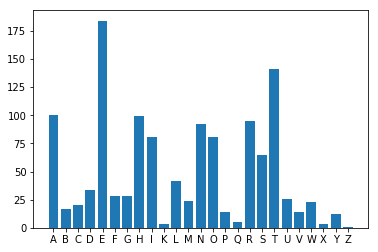

In [180]:
plt.bar(range(len(sorted_dict)), sorted_dict.values(), align='center')
plt.xticks(range(len(sorted_dict)), list(sorted_dict.keys()))
plt.show()

The graph above shows that in the test message, the letters E and T are the most frequent.  The primary weakness of a simple subsitution cipher is that the frequency of the letters are not altered and the letters A, E and T can be easily guessed.

Common two letter combinations are called bigrams.  The frequency distribution of bigrams for the english language is well known and can be used to help in the solution of simple substitution ciphers <span id="a9">[[9]](#f9)</span>.

The code below counts the bigrams in the test message and displays a historgram of frequency.  

9. <span id="f9"></span> Wikipedia contributors. (2020, December 13). Bigram. In Wikipedia, The Free Encyclopedia. Retrieved 02:42, January 13, 2021, from https://en.wikipedia.org/w/index.php?title=Bigram&oldid=994038151 [$\hookleftarrow$](#a9)

In [181]:
# count common double characters, such as th, ll 
res1 = Counter(PT[idx : idx + 2] for idx in range(len(PT) - 1)) 

In [182]:
res1_sorted = dict(sorted(res1.items(), key=lambda item: item[1],reverse=True))

In [183]:
res1_sorted_sliced = dict(itertools.islice(res1_sorted.items(), 50))

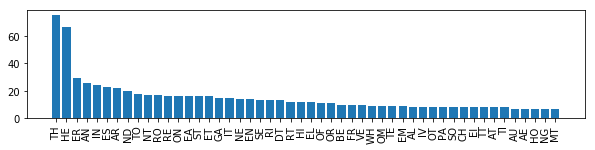

In [184]:
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)

plt.bar(range(len(res1_sorted_sliced)), res1_sorted_sliced.values(), align='center')
plt.xticks(range(len(res1_sorted_sliced)), list(res1_sorted_sliced.keys()))
plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='x')
plt.show()

The above graph shows that the most common letter pairs are TH and HE.

### 2.b) Character encoding for processing <a id="section2b"></a> 
In computers, letters and other symbols are encoded for electronic communication.  Historically, one of the first methods for encoding letters and numbers was Morse code.  Morse code was and still is used for sending messages over radio waves, but not as much on telegraph wires.  This type of encoding was used for the efficient transfer of information and not for encryption of the data.  

The test message is encoded as ASCII characters within the computer file <span id="a9">[[9]](#f9)</span>.  The capital letter A is the decimal number 65, B is 66 and so on, all the way to Z, which is 90.  Thus the capital leters of the aplhabet are encoded as the numbers 65 to 90.  For processing, the code below subtracts 65 from the decimal representation to encode the characters as numbers that range from 0 to 25, thus A=0, B=1, ..., Z=25.        

The first step is to convert the text message from ASCII values to an array of numbers, where A=0, B=1, ..., Z=25.  The following line of python do that.  Additionally, the numbers in the array are of data type unit8, which means that all the numbers in the array are 8 bit unsigned intergers.  This is important to note since some of the mathmatic operations on the data will be automatically performed as unsigned 8 bit intergers.

9. <span id="f9"></span>Wikipedia contributors. (2021, January 4). ASCII. In Wikipedia, The Free Encyclopedia. Retrieved 13:52, January 11, 2021, from https://en.wikipedia.org/w/index.php?title=ASCII&oldid=998308027 [$\hookleftarrow$](#a9)

In [185]:
# map characters to numbers, A=0, B=1, ..., Z=25
PT_int = np.asarray(list(PT),dtype='|S1').view(np.uint8) - ord('A')
PT_int

array([ 0, 11, 11, ..., 17,  0,  1], dtype=uint8)

As can be seen above the first number in the message array is 0, which corresponds to the letter A and is the first letter in the message.  The next two numbers are 11 and 11, which corespond to the letter L, so the first word in the message is ALL when converted to an array of numbers.  

### 2.c) Key generation <a id="section2c"></a> 
The input key string can be any length using any characters.  The input key string is however striped of all non-letter characters and converted to upper case.  In this example, the names of common animals are used as words in the pass word.  Only left 16 characters are used.  Additional comments about key length and choice of the letters used in the key will be provided in the cryptanalysis section below.  

The following code takes the key string and converts it to an all capital text string of length block size.  The key is divided into equal parts with the first half saved as K0 and the second half saved as K1 for used in test code later. K0 and K1 are called the subkeys.

In [186]:
# generate subkeys from text string
key_string = 'elephantzebratigermonkeylion'
print('input key string: ',key_string)
print('input key string length = {:d}'.format(len(key_string)))
key_alpha_caps = ''.join(e for e in key_string if e.isalpha()).upper()[0:block_size]
print('key as alpha caps trimmed to block size: ',key_alpha_caps)

# only use the right most characters equal to block size
key = (np.asarray(list(key_alpha_caps),dtype='|S1').view(np.uint8) - ord('A'))[0:block_size]

# extract sub keys
K0 = key[0:int(block_size/2)]
K1 = key[int(block_size/2):block_size]
print('subkey 0: ',K0)
print('subkey 1: ',K1)

input key string:  elephantzebratigermonkeylion
input key string length = 28
key as alpha caps trimmed to block size:  ELEPHANTZEBRATIG
subkey 0:  [ 4 11  4 15  7  0 13 19]
subkey 1:  [25  4  1 17  0 19  8  6]


In [187]:
# print subkeys as alpha characters
print((K0+ord('A')).tostring().decode('ascii'))
print((K1+ord('A')).tostring().decode('ascii'))

ELEPHANT
ZEBRATIG


sub keys are only used for testing code fragments

Add come comments about proper key choice   

#### Get 1st block of data to process
The first block of data is used for testing some of the code below. The block consists of right side, R0 and left side, L0.  

In [188]:
L0 = PT_int[0:int(block_size/2)]
R0 = PT_int[int(block_size/2):int(block_size)]
print('left side block', L0)
print('right side block', R0)

left side block [ 0 11 11  6  0 20 11  8]
right side block [18  3  8 21  8  3  4  3]


In [189]:
# check of data 
(np.append(L0,R0)+ord('A')).tostring().decode('ascii')

'ALLGAULISDIVIDED'

### 2.d) Character XOR <a id="section2d"></a> 
One of the operations needed for the encryption algorithum is the Exclusive Or (XOR) function. This logic function normally operates on individual bits, but for this encryption algorthum we need to opeate on characters. The following cells explain why we can't use the bit wise XOR operation.  

~~As explained later the XOR operation is used in the encryption alogrithum and we need one that operated on characters, not just bits.~~

Using some sample data, R0, the right half of half of the first data block and the subkey K0, use bitwise_xor to do the XOR operation.   

Maybe remove the test code.   Is it necessary or does it add much to the paper?  In general do we include debugging and test code?

In [190]:
np.bitwise_xor(R0,K0)

array([22,  8, 12, 26, 15,  3,  9, 16], dtype=uint8)

As can be seen in the result, the fourth element of the results is 26.  We need a result that is modulo 25.  Therefore we can't use bit wise xor as the logic operator for this algorithum.  

If we just add the values using simple addition, we also get results that are greater than the 26, which are not valid characters.

In [191]:
A = (R0 + K0)
print(A)

[22 14 12 36 15  3 17 22]


If we add R0 and K0 and use the pythom modulo operator we can get the correct results.

In [192]:
A1 = (R0 + K0) % 26
A1

array([22, 14, 12, 10, 15,  3, 17, 22], dtype=uint8)

One of the propoeties of the XOR function is that repeating the operation twice will give back the starting result.  The modulo addition does not have this property, so we need an inverse character XOR function.

As shown below, subtraction modulo 25 will give the correct invers xor results in some cases.

In [193]:
(A1 - K0) % 26

array([18,  3,  8, 17,  8,  3,  4,  3], dtype=uint8)

R0 is not correct.  Using a bit of code and checking magnitude of the operands before doing the subtraction, we can get the correct results. 

In [194]:
Rx = np.ones(len(K0),dtype=np.uint8)
for i in range(len(K0)):
    if A1[i] >= K0[i]:
        Rx[i] = A1[i] - K0[i]
    if A1[i] < K0[i]:
        Rx[i] = (A1[i]+26) - K0[i]
print(Rx)

[18  3  8 21  8  3  4  3]


The above calcuation gives the correct result.

We can write a function to do the character XOR and the inverse XOR.  

In [195]:
# forward function
def char_xor(a,b):
    return (a + b) % 26

In [196]:
char_xor(R0,K0)

array([22, 14, 12, 10, 15,  3, 17, 22], dtype=uint8)

In [197]:
# reverse function
def inv_char_xor(a,b):
    r = np.ones(len(b),dtype=np.uint8)
    for i in range(len(b)):
        if a[i] >= b[i]:
            r[i] = a[i] - b[i]
        if a[i] < b[i]:
            r[i] = (a[i]+26) - b[i]
    return r

Testing the inverse XOR function.

In [198]:
R0

array([18,  3,  8, 21,  8,  3,  4,  3], dtype=uint8)

In [199]:
A = char_xor(R0,K0)
A

array([22, 14, 12, 10, 15,  3, 17, 22], dtype=uint8)

In [200]:
inv_char_xor(A,K0)

array([18,  3,  8, 21,  8,  3,  4,  3], dtype=uint8)

This is the correct result.

### 2.e) S-box <a id="section2e"></a> 
The S-box is a matrix which is used to map the message characters to different characters in a non-predictiable way. The concept and use of a S-box is well known in block ciphers.  The S-box performs substitution, where one character is transformed into another in some complicated way.  According to Wikipedia[], the purpose of the S-box is to hide the relationship between the key and the ciphertext. The goal was to make the S-box act as a non-linear function, so that the output cannot be expressed as a linear equation, i.e. a straight line ($y = mx+b$).  

There are two well known examples of S-boxes and these are the ones used in the now obsolet Data Encryption Standard (DES)[] and the Advanced Data Encryption Standard (AES)[].  The S-box implement here loosly follows the DES S-box.  

S0, S1, ... S7 are arrays that constist of the numbers 0 to 26 in different random orders. S0, S1, ... S7 are combined into a matrix for processing within a For loop.   The input data is used as index to S0, for example, and the value returned is some new value.   The matrix of S0, S1, ... S7 is the two dimentional array called s_box.  

Wikipedia contributors. (2021, January 7). S-box. In Wikipedia, The Free Encyclopedia. Retrieved 14:32, January 11, 2021, from https://en.wikipedia.org/w/index.php?title=S-box&oldid=998908798  

Wikipedia contributors. (2020, December 25). Data Encryption Standard. In Wikipedia, The Free Encyclopedia. Retrieved 14:30, January 11, 2021, from https://en.wikipedia.org/w/index.php?title=Data_Encryption_Standard&oldid=996197167  

Wikipedia contributors. (2021, January 7). Advanced Encryption Standard. In Wikipedia, The Free Encyclopedia. Retrieved 14:31, January 11, 2021, from https://en.wikipedia.org/w/index.php?title=Advanced_Encryption_Standard&oldid=998858677  



In [201]:
# generator code
s = np.arange(0,26)
np.random.shuffle(s)
s

array([ 5,  2, 17,  9,  7, 13, 22, 24, 23, 25, 15, 12, 18,  1,  0,  3, 11,
        6, 19,  8, 14, 21,  4, 16, 20, 10])

The generator code is run a number of times to get the values for the arrays.

In [202]:
S0 = np.array([17,  5,  2, 24, 15, 10, 21,  0, 25, 19,  1, 20, 13,  8,  7, 16, 23,
        6,  4, 22,  9, 18, 11, 12, 14,  3],dtype=np.uint8)
S1 = np.array([22,  3, 10, 17, 23, 20,  5, 15, 18,  7, 16, 11, 21,  6,  9,  4, 12,
       25, 13, 19,  8,  2,  1,  0, 24, 14],dtype=np.uint8)
S2 = np.array([19, 11, 24, 21, 18,  8, 14, 16,  9, 12,  7, 22, 17,  3,  4, 15,  5,
       25, 10, 23, 20,  2,  1, 13,  6,  0],dtype=np.uint8)
S3 = np.array([ 1, 23, 13,  0, 10, 20, 25, 18,  2,  6, 14, 19,  5, 24, 16, 17,  8,
        4, 22, 15,  3, 12, 11,  9, 21,  7],dtype=np.uint8)
S4 = np.array([25, 19, 17,  2,  8, 10, 15, 16, 13,  6,  0, 24,  9,  4, 20,  7, 18,
       11,  1, 12, 22, 23, 14, 21,  5,  3],dtype=np.uint8)
S5 = np.array([ 9, 12,  6,  3, 23, 11, 20, 10, 13, 16,  4, 25,  5, 19,  0, 21,  2,
       24, 22,  7, 15,  8, 18,  1, 14, 17],dtype=np.uint8)
S6 = np.array([21, 10, 22, 25,  3,  7, 15,  0, 24, 14,  1, 13,  6, 17, 11,  2,  4,
       16,  5, 23,  8, 20, 19,  9, 18, 12],dtype=np.uint8)
S7 = np.array([16, 23,  4,  9,  7,  8, 18, 11, 22, 24,  6, 15, 13,  2, 12,  3, 14,
       10, 17,  5, 25, 21, 20, 19,  1,  0],dtype=np.uint8)

In [203]:
# assemble the individual S-boxes into an m by n array, where m is the size of the alphabet and n is block_size/2
S_box = np.array([S0,S1,S2,S3,S4,S5,S6,S7])
print(S_box)

[[17  5  2 24 15 10 21  0 25 19  1 20 13  8  7 16 23  6  4 22  9 18 11 12
  14  3]
 [22  3 10 17 23 20  5 15 18  7 16 11 21  6  9  4 12 25 13 19  8  2  1  0
  24 14]
 [19 11 24 21 18  8 14 16  9 12  7 22 17  3  4 15  5 25 10 23 20  2  1 13
   6  0]
 [ 1 23 13  0 10 20 25 18  2  6 14 19  5 24 16 17  8  4 22 15  3 12 11  9
  21  7]
 [25 19 17  2  8 10 15 16 13  6  0 24  9  4 20  7 18 11  1 12 22 23 14 21
   5  3]
 [ 9 12  6  3 23 11 20 10 13 16  4 25  5 19  0 21  2 24 22  7 15  8 18  1
  14 17]
 [21 10 22 25  3  7 15  0 24 14  1 13  6 17 11  2  4 16  5 23  8 20 19  9
  18 12]
 [16 23  4  9  7  8 18 11 22 24  6 15 13  2 12  3 14 10 17  5 25 21 20 19
   1  0]]


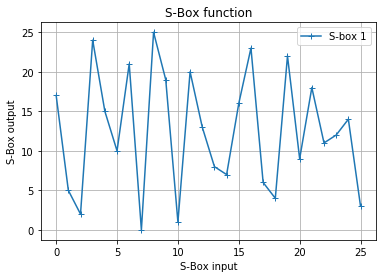

In [204]:
# plot one of the S-boxes
plt.plot(S_box[0],'+-',label='S-box 1')
plt.title('S-Box function')
plt.xlabel('S-Box input')
plt.ylabel('S-Box output')
plt.legend(loc='upper right')
plt.grid()
plt.show()

As can be seen in the plot above the mapping of input to out put is not a smooth function.   

### 2.f) Mixer matrix <a id="section2f"></a> 
The Mixer is a matrix of 0 or 1 values and is used to expand operation of s-boxes across several characters in the message half-block.  Without the Mixer matrix, the S-box output character would be only depended on its corresponding input character and therefore there would exist a one to one correspondeance.  The one to one correspondance would make it easier to walk backwards throuh the encryption steps and recover the key from know cipher text and the known correspong plain text.  The ability to recover the key in this way is considered a weakness and discussed more in the cryptanalyssis section.  

The use of Mixer combines at least two other characters in the half-block with the main character using modulo 26 addition.  The mixed character is then used as the index to the S-box and the out put is corresponding value in the matrix.  Changing one character in the half-block causes multiple characters in the S-box output to change.  This cascade feature is a desirable feature for S-boxes. 

The Mixer matrix is not a part of the DES Fiestal function.  However, within the DES S-Box, 6 bits are used as inputs to each DES S-Box and the outer bits together with the four inner bits are as corrdinates into a look up table for the corresponding 4 bits of output.  The effect is that a group of bits is used to determine the output group of bits.  

Using this same idea, of a many to one relationship, the mixer matrix is implement as an identity matrix with a few other ones sprinked around the matrix, more or less at random.  When the matrix is multipled by the input vector, each value in the output will depend on the corresponding input as well as at least two other elements in the input vector.  In this way the out character is a mix of several input characters.    

This is the S-Box mixer matrix:  
~~~
 1 1 0 0 0 0 1 0
 0 1 0 1 0 0 0 1
 0 0 1 1 0 1 0 0
 1 0 0 1 0 0 1 0
 1 0 0 1 1 0 0 0
 0 0 0 0 1 1 0 1
 0 1 0 0 0 1 1 0
 0 0 1 0 1 0 0 1
~~~
The diagomal elements are all ones and in each row, two other positions are filled in with ones on a ramdom basis.  

In [205]:
Mixer = np.array( \
    [[1, 1, 0, 0, 0, 0, 1, 0],
     [0, 1, 0, 1, 0, 0, 0, 1],
     [0, 0, 1, 1, 0, 1, 0, 0],
     [1, 0, 0, 1, 0, 0, 1, 0],
     [1, 0, 0, 1, 1, 0, 0, 0],
     [0, 0, 0, 0, 1, 1, 0, 1],
     [0, 1, 0, 0, 0, 1, 1, 0],
     [0, 0, 1, 0, 1, 0, 0, 1]],dtype=np.uint8)
print(Mixer)    

[[1 1 0 0 0 0 1 0]
 [0 1 0 1 0 0 0 1]
 [0 0 1 1 0 1 0 0]
 [1 0 0 1 0 0 1 0]
 [1 0 0 1 1 0 0 0]
 [0 0 0 0 1 1 0 1]
 [0 1 0 0 0 1 1 0]
 [0 0 1 0 1 0 0 1]]


In [206]:
test = np.array([17,  5,  2, 24, 15, 10, 21,  0],dtype=np.uint8)

In [207]:
test = np.reshape(test, (-1, 1))

*Move this to the analysis section*   
describe the matrxi operation and run some tests.   is it modulo 255 ? and how does that roll down to modulo 25 ???   


https://numpy.org/doc/stable/reference/generated/numpy.matmul.html





In [208]:
result = Mixer*test % 25
result

array([[17, 17,  0,  0,  0,  0, 17,  0],
       [ 0,  5,  0,  5,  0,  0,  0,  5],
       [ 0,  0,  2,  2,  0,  2,  0,  0],
       [24,  0,  0, 24,  0,  0, 24,  0],
       [15,  0,  0, 15, 15,  0,  0,  0],
       [ 0,  0,  0,  0, 10, 10,  0, 10],
       [ 0, 21,  0,  0,  0, 21, 21,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]], dtype=uint8)

In [209]:
Mixer @ test % 25

array([[18],
       [ 4],
       [11],
       [12],
       [ 6],
       [ 0],
       [11],
       [17]], dtype=uint8)

In [210]:
np.dot(Mixer,test) % 25

array([[18],
       [ 4],
       [11],
       [12],
       [ 6],
       [ 0],
       [11],
       [17]], dtype=uint8)

In [211]:
(Mixer1 @ test) % 25

array([[18],
       [ 4],
       [11],
       [12],
       [ 6],
       [ 0],
       [11],
       [17]], dtype=uint8)

In [212]:
np.multiply(Mixer1,test)

array([[17, 17,  0,  0,  0,  0, 17,  0],
       [ 0,  5,  0,  5,  0,  0,  0,  5],
       [ 0,  0,  2,  2,  0,  2,  0,  0],
       [24,  0,  0, 24,  0,  0, 24,  0],
       [15,  0,  0, 15, 15,  0,  0,  0],
       [ 0,  0,  0,  0, 10, 10,  0, 10],
       [ 0, 21,  0,  0,  0, 21, 21,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0]], dtype=uint8)

In [213]:
np.dot(Mixer1,test) % 25

array([[18],
       [ 4],
       [11],
       [12],
       [ 6],
       [ 0],
       [11],
       [17]], dtype=uint8)

#### is the mixer matrix invertable?

In [214]:
Mixer_inv = np.linalg.inv(Mixer)
Mixer_inv

array([[ 1.33333333, -0.16666667,  0.5       , -0.16666667, -0.16666667,
         0.66666667, -1.16666667, -0.5       ],
       [ 0.33333333,  0.33333333,  0.        , -0.66666667,  0.33333333,
        -0.33333333,  0.33333333,  0.        ],
       [ 0.33333333, -0.16666667,  0.5       , -0.16666667, -0.16666667,
        -0.33333333, -0.16666667,  0.5       ],
       [-0.66666667,  0.33333333,  0.        ,  0.33333333,  0.33333333,
        -0.33333333,  0.33333333,  0.        ],
       [-0.66666667, -0.16666667, -0.5       , -0.16666667,  0.83333333,
        -0.33333333,  0.83333333,  0.5       ],
       [ 0.33333333, -0.16666667,  0.5       , -0.16666667, -0.16666667,
         0.66666667, -0.16666667, -0.5       ],
       [-0.66666667, -0.16666667, -0.5       ,  0.83333333, -0.16666667,
        -0.33333333,  0.83333333,  0.5       ],
       [ 0.33333333,  0.33333333, -0.        ,  0.33333333, -0.66666667,
         0.66666667, -0.66666667, -0.        ]])

notice that the invers of s_box_mixer in now of floats for the data type  
Reversability of the Fiestel function seems in doubt, so knowedge of PT and CT will not allow the key to be recovered.


In [215]:
Mixer_inv*result

array([[ 22.66666667,  -2.83333333,   0.        ,  -0.        ,
         -0.        ,   0.        , -19.83333333,  -0.        ],
       [  0.        ,   1.66666667,   0.        ,  -3.33333333,
          0.        ,  -0.        ,   0.        ,   0.        ],
       [  0.        ,  -0.        ,   1.        ,  -0.33333333,
         -0.        ,  -0.66666667,  -0.        ,   0.        ],
       [-16.        ,   0.        ,   0.        ,   8.        ,
          0.        ,  -0.        ,   8.        ,   0.        ],
       [-10.        ,  -0.        ,  -0.        ,  -2.5       ,
         12.5       ,  -0.        ,   0.        ,   0.        ],
       [  0.        ,  -0.        ,   0.        ,  -0.        ,
         -1.66666667,   6.66666667,  -0.        ,  -5.        ],
       [ -0.        ,  -3.5       ,  -0.        ,   0.        ,
         -0.        ,  -7.        ,  17.5       ,   0.        ],
       [  0.        ,   0.        ,  -0.        ,   0.        ,
         -0.        ,   0.       

In [216]:
test

array([[17],
       [ 5],
       [ 2],
       [24],
       [15],
       [10],
       [21],
       [ 0]], dtype=uint8)

The results above suggest that the mixer matrix multiplication is not reversable by normal linear algebra.  

Run some more sample code to check the math.   

#### explore some alternate code for matrix multiplation

In [217]:
# using modulo 26 at each addition
(((((24+5) % 26) + 10) % 26) + 20) % 26

7

In [218]:
# using modulo 26 only at the end 
(24+5+10+20) % 26

7

In [219]:
np.asarray(result).reshape(-1)

array([17, 17,  0,  0,  0,  0, 17,  0,  0,  5,  0,  5,  0,  0,  0,  5,  0,
        0,  2,  2,  0,  2,  0,  0, 24,  0,  0, 24,  0,  0, 24,  0, 15,  0,
        0, 15, 15,  0,  0,  0,  0,  0,  0,  0, 10, 10,  0, 10,  0, 21,  0,
        0,  0, 21, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=uint8)

So now each out put is a linear combination of several other characters.  Use the values as an index into previous generated x-boxes to get a non-linear output.

In [220]:
np.asarray(Mixer*test % 26).reshape(-1)  # after matrix multiplication, convert back to array

array([17, 17,  0,  0,  0,  0, 17,  0,  0,  5,  0,  5,  0,  0,  0,  5,  0,
        0,  2,  2,  0,  2,  0,  0, 24,  0,  0, 24,  0,  0, 24,  0, 15,  0,
        0, 15, 15,  0,  0,  0,  0,  0,  0,  0, 10, 10,  0, 10,  0, 21,  0,
        0,  0, 21, 21,  0,  0,  0,  0,  0,  0,  0,  0,  0], dtype=uint8)

In [221]:
test = np.array([17,  5,  2, 24, 15, 10, 21,  0],dtype=np.uint8)

In [222]:
test = np.reshape(char_xor(test,K0), (-1, 1))
test

array([[21],
       [16],
       [ 6],
       [13],
       [22],
       [10],
       [ 8],
       [19]], dtype=uint8)

In [223]:
(np.asarray(Mixer*test) % 26).reshape(-1)

array([21, 21,  0,  0,  0,  0, 21,  0,  0, 16,  0, 16,  0,  0,  0, 16,  0,
        0,  6,  6,  0,  6,  0,  0, 13,  0,  0, 13,  0,  0, 13,  0, 22,  0,
        0, 22, 22,  0,  0,  0,  0,  0,  0,  0, 10, 10,  0, 10,  0,  8,  0,
        0,  0,  8,  8,  0,  0,  0, 19,  0, 19,  0,  0, 19], dtype=uint8)

### 2.g) P-table <a id="section2g"></a> 
The P-table is used to shuffle the characters of the half-block so that bigram relationships are altered.  The table is implemented as an array of values from 0 to 7 in a random order.  The P-table permutes the order of the output so that adjacent characters in the input message are no longer adjacent.  This thwarts bigram frequency analysis of the cipher text.  

The design of the P-table should be to produce a random shuffeling and seperate adjacent characters.


In [224]:
# generator code
i = np.arange(0,block_size/2,dtype=np.uint8)
np.random.shuffle(i)
print(i)

[7 1 2 6 4 0 3 5]


In [225]:
# run the generator code above and copy the result to the P_table array once.
P_table = np.array([7, 2, 6, 5, 0, 4, 3, 1],dtype=np.uint8)
print(P_table)

[7 2 6 5 0 4 3 1]


### 2.h) Feistel function <a id="section2h"></a> 
The Feistel function implemented in this project will losely follow the DES implementation.  Within a Feistel network, the function can be almost any function. A simple pass through function or a one way hash function could be used.  Since we are not going to design a new function from scratch, we will just follow the DES Feistel function with some modifications.  Primarily, the use of the Mixer matrix is new and the S-box and the P-table are different.

diagram of the network was shown above    
Add a block diagram of the Feistel function         

explain the function block diagram      

Does the order of Data XOR SubKey -> Mixer -> S-Box -> P-table make a difference?  explore this in the analysis section.   

Figure 4:  The Feistel function FF()   

The F-function, depicted in Figure 2, operates on half a block (32 bits) at a time and consists of four stages:

Expansion: the 32-bit half-block is expanded to 48 bits using the expansion permutation, denoted E in the diagram, by duplicating half of the bits. The output consists of eight 6-bit (8 × 6 = 48 bits) pieces, each containing a copy of 4 corresponding input bits, plus a copy of the immediately adjacent bit from each of the input pieces to either side.
Key mixing: the result is combined with a subkey using an XOR operation. Sixteen 48-bit subkeys—one for each round—are derived from the main key using the key schedule (described below).


Substitution: after mixing in the subkey, the block is divided into eight 6-bit pieces before processing by the S-boxes, or substitution boxes. Each of the eight S-boxes replaces its six input bits with four output bits according to a non-linear transformation, provided in the form of a lookup table. The S-boxes provide the core of the security of DES—without them, the cipher would be linear, and trivially breakable.


Permutation: finally, the 32 outputs from the S-boxes are rearranged according to a fixed permutation, the P-box. This is designed so that, after permutation, the bits from the output of each S-box in this round are spread across four different S-boxes in the next round.


The alternation of substitution from the S-boxes, and permutation of bits from the P-box and E-expansion provides so-called "confusion and diffusion" respectively, a concept identified by Claude Shannon in the 1940s as a necessary condition for a secure yet practical cipher.

In [226]:
S = char_xor(R0,K0)  # 1st half block XOR with sub key

# run each element of S through the S_box matrix as an index
for i in range(int(block_size/2)):
    S[i] = S_box[i][S[i]]

# permutate the element order of S according to P
F = np.ones(int(block_size/2),dtype=np.uint8)
for i in range(len(F)):
    F[i] = S[P_table[i]]
F

array([20, 17, 16,  3, 11,  7, 14,  9], dtype=uint8)

In [227]:
S

array([11,  9, 17, 14,  7,  3, 16, 20], dtype=uint8)

The following code implements the Feistel function

In [228]:
# Feistel function, FF()
def FF(a,k):
    # xor data with the subkey and reshape for matrix multiplication
    xor_out = np.reshape(char_xor(a,k), (-1, 1))
    # use the mixer matrix to make each element of s dependent on several other elements in the block
    s = (np.asarray(Mixer @ xor_out) % 25).reshape(-1)  # @ is the matrix dot operator

    # run each element of s through the S_box matrix as an index and replace with new value
    for i in range(int(block_size/2)):
        s[i] = S_box[i][s[i]]

    # permutate the element order of S according to P
    f = np.ones(int(block_size/2),dtype=np.uint8)
    for i in range(len(f)):
        f[i] = s[P_table[i]]
    return f    

#### Encryption test
probably don't need these cells of code.  They don't add anything to the explaiation.   remove from report.  

## 3) Design <a id="section3"></a>


- Feistel network  
need at least two round to process both sides of the block
- proposed Feistel function
- purpose and function of Mixer, S-boxes and P-table
- various modes

https://en.wikipedia.org/wiki/Feistel_cipher

Design
A Feistel network uses a round function, a function which takes two inputs, a data block and a subkey, and returns one output the same size as the data block.[1] In each round, the round function is run on half of the data to be encrypted and its output is XORed with the other half of the data. This is repeated a fixed number of times, and the final output is the encrypted data. An important advantage of Feistel networks compared to other cipher designs such as substitution–permutation networks is the entire operation is guaranteed to be invertible (that is, encrypted data can be decrypted), even if the round function is not itself invertible. The round function can be made arbitrarily complicated, since it does not need to be designed to be invertible.[2]:465 [3]:347 Furthermore, the encryption and decryption operations are very similar, even identical in some cases, requiring only a reversal of the key schedule. Therefore, the size of the code or circuitry required to implement such a cipher is nearly halved.

Substitution–permutation network  
https://en.wikipedia.org/wiki/Substitution%E2%80%93permutation_network  


Add figures <<<<------  
https://en.wikipedia.org/wiki/Block_cipher_mode_of_operation#Electronic_codebook_(ECB)


Electronic codebook (ECB)  
The simplest of the encryption modes is the electronic codebook (ECB) mode (named after conventional physical codebooks[19]). The message is divided into blocks, and each block is encrypted separately.
The disadvantage of this method is a lack of diffusion. Because ECB encrypts identical plaintext blocks into identical ciphertext blocks, it does not hide data patterns well. ECB is not recommended for use in cryptographic protocols.[20][21][22]

Cipher block chaining (CBC)  
Ehrsam, Meyer, Smith and Tuchman invented the cipher block chaining (CBC) mode of operation in 1976.[23] In CBC mode, each block of plaintext is XORed with the previous ciphertext block before being encrypted. This way, each ciphertext block depends on all plaintext blocks processed up to that point. To make each message unique, an initialization vector must be used in the first block.
CBC has been the most commonly used mode of operation. Its main drawbacks are that encryption is sequential (i.e., it cannot be parallelized), and that the message must be padded to a multiple of the cipher block size. One way to handle this last issue is through the method known as ciphertext stealing. Note that a one-bit change in a plaintext or initialization vector (IV) affects all following ciphertext blocks.


Other modes, don't discuss    


Propagating cipher block chaining (PCBC)   
The propagating cipher block chaining[25] or plaintext cipher-block chaining[26] mode was designed to cause small changes in the ciphertext to propagate indefinitely when decrypting, as well as when encrypting. In PCBC mode, each block of plaintext is XORed with both the previous plaintext block and the previous ciphertext block before being encrypted. As with CBC mode, an initialization vector is used in the first block.

Full-block CFB   
The cipher feedback (CFB) mode, in its simplest form is using the entire output of the block cipher. In this variation, it is very similar to CBC, makes a block cipher into a self-synchronizing stream cipher. CFB decryption in this variation is almost identical to CBC encryption performed in reverse:

Output feedback (OFB)   
The output feedback (OFB) mode makes a block cipher into a synchronous stream cipher. It generates keystream blocks, which are then XORed with the plaintext blocks to get the ciphertext. Just as with other stream ciphers, flipping a bit in the ciphertext produces a flipped bit in the plaintext at the same location. This property allows many error-correcting codes to function normally even when applied before encryption.

other options are block chaining   

When encrypting data using a block cipher in cipher block chaining (or another) mode, it is common to introduce an initialization vector to the first stage of the encryption process. It is typically required that this vector be chosen randomly (a nonce) and that it is not repeated for any given secret key under which the block cipher operates. This provides semantic security, by means of ensuring the same plain text is not encrypted to the same cipher text, allowing an attacker to infer a relationship exists.

could write some new functions:  encrypt_ECB, encrypt_CBC

In [229]:
# encrypt function
def encrypt(a,k):
    '''
    a is a block of data to be encrypted of block size
    k is the key of block size
    '''
    # divide data into half blocks
    left_0 = a[0:int(block_size/2)]  # left side of the block
    right_0 = a[int(block_size/2):int(block_size)]  # right side of the block
    
    # extract sub keys
    k0 = k[0:8]
    k1 = k[1:9]
    
    # round 0
    right_1 = char_xor(left_0,FF(right_0,k0))
    left_1 = right_0

    #round 1
    right_2 = char_xor(left_1,FF(right_1,k1))
    left_2 = right_1

    return np.append(left_2,right_2)

In [230]:
x = encrypt(PT_int[0:block_size],key)
x

array([ 1,  4, 25,  1, 24,  8,  6, 10, 12, 13, 11, 18, 17, 15,  7, 25],
      dtype=uint8)

In [231]:
(x+ord('A')).tostring().decode('ascii')

'BEZBYIGKMNLSRPHZ'

In [232]:
# decrypt function
def decrypt(a,k):
    '''
    a is a block of data to be decrypted of block size
    k is the key of block size
    '''
    # divide data into half blocks
    left_2 = a[0:int(block_size/2)]
    right_2 = a[int(block_size/2):int(block_size)]
    
    # extract sub keys
    k0 = k[0:8]
    k1 = k[1:9]    
    
    # round 1
    left_1 = inv_char_xor(right_2,FF(left_2,k1))
    right_1 = left_2

    # round 0
    left_0 = inv_char_xor(right_1,FF(left_1,k0))
    right_0 = left_1
    
    return np.append(left_0,right_0)

In [233]:
y = decrypt(x,key)
y

array([ 0, 11, 11,  6,  0, 20, 11,  8, 18,  3,  8, 21,  8,  3,  4,  3],
      dtype=uint8)

In [234]:
(y+ord('A')).tostring().decode('ascii')

'ALLGAULISDIVIDED'

## 4) Test message <a id="section4"></a>
- divide the message into blocks
- encrypt message
- decrypt message

### Encrypt the test message

In [235]:
# use numpy to chop message into block size

In [236]:
PT_int

array([ 0, 11, 11, ..., 17,  0,  1], dtype=uint8)

In [237]:
len(PT_int)/block_size

77.0

In [238]:
msg_block = np.array_split(PT_int, len(PT_int)/block_size)

In [239]:
msg_block[0]

array([ 0, 11, 11,  6,  0, 20, 11,  8, 18,  3,  8, 21,  8,  3,  4,  3],
      dtype=uint8)

In [240]:
len(msg_block)

77

In [241]:
ct = []
for i in msg_block:
    ct = np.append(ct,encrypt(i,key)).astype(np.uint8) #, dtype=np.uint8)

In [242]:
ct

array([ 1,  4, 25, ..., 24, 22,  2], dtype=uint8)

In [243]:
len(ct)

1232

In [244]:
ct.max()

25

In [245]:
ct.min()

0

In [246]:
# convert back to alpha characters
ct_aplha = (ct+ord('A')).tostring().decode('ascii')

In [247]:
string = ct_aplha
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

BEZBYIGKMNLSRPHZOIQCMBIZSKWABPCVGVOYIHEYRCJNUVJRVSBSNZOBACIJRGGUYQOXPHEQAPK
QQUXFYMDJLZNSMQKIGYMEBWKGEEVKCTAPIKUMXKLUTSREUIOYTJTGZOVBWSULRRFJAPEQAZPYMO
AKSOXLGGFHTFWWYBRLDXSTFDQTTAMFKUQZNYZKBXSKWGWPOKIKNOFIXFMFTZWGNMWEVURVSOSJC
MVLJOGXSEQBCLZSHLFDGQJGWBMPBXUNJFHJIGXODJEZKQYMKRZLEVWQDTPKTIOYMRQSSECTHISE
HSKNEBZHZQTUAHPWYIZKRFBWFEFRSNJFUHOTOCITFNZZMBFXBNNYGHOMUXMIWVYZQEZJPLPOZOP
WCPJUTXXIHCBURHCMJHNFWRCLFFLWRIKWVNCCYLOANYHROZFOTNKHZWRBCGSUFXAEGDZALRGVXA
JDJLICKRQTIESXMCWVESTKFXNWOMXSDCQRCZZVQFAIEONZCVVIGDEJOIESYXEISBXXIAWBNERPQ
FLYJXSKCEGFCQQZOULJMISJSUUOYPIVTHRMWUJZAIAROGPYZMSNMAJPMWMIJBMHRUTLJJPXKSIP
UVFKOGMTWUFHMUKVSSHEGQRAIYZRUKXSJWRWVRGYPBULYAVQRQAZPWWYHYGZOZKHSMJRQVENSZG
WNFNSONIUUQNRYNKTSHCAKIPBPJIQEEILBCDQQGEUPKQMAJJPFCIAMNRCKMKHTRXLUTJKCBWLGD
ZWOCHHTRRPAQMJKFVPCWJENTITOFUQZXDZGMNUNEZVONCKJVBIGMWJHBECJWHNZYQZNQXCGWTFI
CRKZXEQCYIGQIYUCQTINYAAMIJXQZMCBSWEUUWQTKHQWBWRURYNDGICPZLQFVFOUSSEVQZXEWRX
XBVFKLSJTDGIILMUEIOVXRMTIAREBMDSVVECHCBGJEFGJKWLKUOMCASFEZVGKJLLQNKJOYVHUDL
NXSOPNWVJTQA

### decrypt the test message

In [248]:
# starting with ct_alpha, convert to array of dtype=uint8

# map characters to numbers, A=0, B=1, ..., Z=25
ct_int = np.asarray(list(ct_aplha),dtype='|S1').view(np.uint8) - ord('A')
ct_int

array([ 1,  4, 25, ..., 24, 22,  2], dtype=uint8)

In [249]:
ct_msg_blocks = np.array_split(ct_int, len(ct_int)/block_size)

In [250]:
pt = []
for i in ct_msg_blocks:
    pt = np.append(pt,decrypt(i,key)).astype(np.uint8) #, dtype=np.uint8)

In [251]:
pt

array([ 0, 11, 11, ..., 17,  0,  1], dtype=uint8)

In [252]:
pt_aplha = (pt+ord('A')).tostring().decode('ascii')

In [253]:
string = pt_aplha
length = 75
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

for i in list_of_strings:
    print(i)

ALLGAULISDIVIDEDINTOTHREEPARTSONEOFWHICHTHEBELGAEINHABITTHEAQUITANIANOTHERT
HOSEWHOINTHEIROWNLANGUAGEARECALLEDCELTSINOURGAULSTHETHIRDALLTHESEDIFFERFROM
EACHOTHERINLANGUAGECUSTOMSANDLAWSTHERIVERGARONNESEPARATESTHEGAULSFROMTHEAQU
ITANITHEMARNEANDTHESEINESEPARATETHEMFROMTHEBELGAEOFALLTHESETHEBELGAEARETHEB
RAVESTBECAUSETHEYAREFURTHESTFROMTHECIVILIZATIONANDREFINEMENTOFOURPROVINCEAN
DMERCHANTSLEASTFREQUENTLYRESORTTOTHEMANDIMPORTTHOSETHINGSWHICHTENDTOEFFEMIN
ATETHEMINDANDTHEYARETHENEARESTTOTHEGERMANSWHODWELLBEYONDTHERHINEWITHWHOMTHE
YARECONTINUALLYWAGINGWARFORWHICHREASONTHEHELVETIIALSOSURPASSTHERESTOFTHEGAU
LSINVALORASTHEYCONTENDWITHTHEGERMANSINALMOSTDAILYBATTLESWHENTHEYEITHERREPEL
THEMFROMTHEIROWNTERRITORIESORTHEMSELVESWAGEWARONTHEIRFRONTIERSONEPARTOFTHES
EWHICHITHASBEENSAIDTHATTHEGAULSOCCUPYTAKESITSBEGINNINGATTHERIVERRHONEITISBO
UNDEDBYTHERIVERGARONNETHEOCEANANDTHETERRITORIESOFTHEBELGAEITBORDERSTOOONTHE
SIDEOFTHESEQUANIANDTHEHELVETIIUPONTHERIVERRHINEANDSTRETCHESTOWARDTHENORTHTH
EBELGAERISES

#### CBC test
need to finish this   

In [254]:
msg_block = np.array_split(PT_int, len(PT_int)/block_size)

## 5) Cryptanalysis <a id="section5"></a>

- frequency analysis of CT   
- bad keys, null case message
- reverse walk through with various assumptions about knowedge of PT, CT and key



will not do a mathematical analysis but more of walk through based on assumptions.  various levels of knowedge about the key and the cipher algorithum.

Also look at some special cases:  bad key, null key, repeating data, null data, 


Modern cryptography is heavily based on mathematical theory and computer science practice; cryptographic algorithms are designed around computational hardness assumptions, making such algorithms hard to break in actual practice by any adversary. While it is theoretically possible to break into a well-designed such system, it is infeasible in actual practice to do so. Such schemes, if well designed, are therefore termed "computationally secure"; theoretical advances, e.g., improvements in integer factorization algorithms, and faster computing technology require these designs to be continually reevaluated, and if necessary, adapted. There exist information-theoretically secure schemes that provably cannot be broken even with unlimited computing power =— an example is the one-time pad —- but these schemes are much more difficult to use in practice than the best theoretically breakable but computationally secure schemes.

The goal of cryptanalysis is to find some weakness or insecurity in a cryptographic scheme, thus permitting its subversion or evasion.

It is a common misconception that every encryption method can be broken. In connection with his WWII work at Bell Labs, Claude Shannon proved that the one-time pad cipher is unbreakable, provided the key material is truly random, never reused, kept secret from all possible attackers, and of equal or greater length than the message.[50] Most ciphers, apart from the one-time pad, can be broken with enough computational effort by brute force attack, but the amount of effort needed may be exponentially dependent on the key size, as compared to the effort needed to make use of the cipher. In such cases, effective security could be achieved if it is proven that the effort required (i.e., "work factor", in Shannon's terms) is beyond the ability of any adversary. This means it must be shown that no efficient method (as opposed to the time-consuming brute force method) can be found to break the cipher. Since no such proof has been found to date, the one-time-pad remains the only theoretically unbreakable cipher.

There are a wide variety of cryptanalytic attacks, and they can be classified in any of several ways. A common distinction turns on what Eve (an attacker) knows and what capabilities are available. In a ciphertext-only attack, Eve has access only to the ciphertext (good modern cryptosystems are usually effectively immune to ciphertext-only attacks). In a known-plaintext attack, Eve has access to a ciphertext and its corresponding plaintext (or to many such pairs). In a chosen-plaintext attack, Eve may choose a plaintext and learn its corresponding ciphertext (perhaps many times); an example is gardening, used by the British during WWII. In a chosen-ciphertext attack, Eve may be able to choose ciphertexts and learn their corresponding plaintexts.[4] Finally in a man-in-the-middle attack Eve gets in between Alice (the sender) and Bob (the recipient), accesses and modifies the traffic and then forwards it to the recipient.[51] Also important, often overwhelmingly so, are mistakes (generally in the design or use of one of the protocols involved).

Cryptanalysis of symmetric-key ciphers typically involves looking for attacks against the block ciphers or stream ciphers that are more efficient than any attack that could be against a perfect cipher. For example, a simple brute force attack against DES requires one known plaintext and 255 decryptions, trying approximately half of the possible keys, to reach a point at which chances are better than even that the key sought will have been found. But this may not be enough assurance; a linear cryptanalysis attack against DES requires 243 known plaintexts (with their corresponding ciphertexts) and approximately 243 DES operations.[52] This is a considerable improvement over brute force attacks.





Substitution cipher  
https://en.wikipedia.org/wiki/Substitution_cipher  

Other S-boxes   
https://en.wikipedia.org/wiki/Rijndael_S-box
https://en.wikipedia.org/wiki/Kaisa_Nyberg  
 

- weakness distinct ciphertexts are not produced when the same plaintext is encrypted multiple times independently with the same key

- look at statistics

Addition discussion about the S-box is in the Cryptanalysis section below.  Can talk about
- what if the mixer was an itentiy matrix, 
- can the S-box be walked through in reveirse?
- review the lituriture



In [255]:
# using collections.Counter() to get  
# count of each element in string  
res = Counter(ct_aplha) 

In [256]:
sorted_dict = {key: value for key, value in sorted(res.items())}

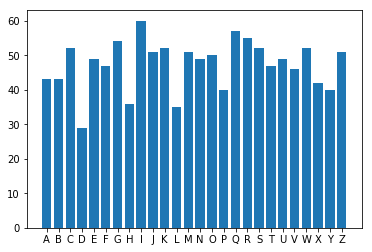

In [257]:
plt.bar(range(len(sorted_dict)), sorted_dict.values(), align='center')
plt.xticks(range(len(sorted_dict)), list(sorted_dict.keys()))
plt.show()

In [258]:
# count common double characters, such as th, ll 
res1 = Counter(ct_aplha[idx : idx + 2] for idx in range(len(ct_aplha) - 1)) 

In [259]:
res1_sorted = dict(sorted(res1.items(), key=lambda item: item[1],reverse=True))

In [260]:
res1_sorted_sliced = dict(itertools.islice(res1_sorted.items(), 50))

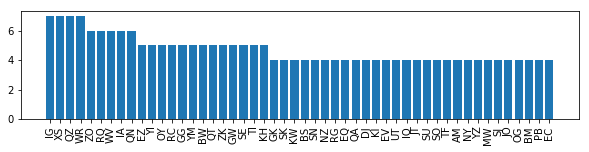

In [261]:
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)

plt.bar(range(len(res1_sorted_sliced)), res1_sorted_sliced.values(), align='center')
plt.xticks(range(len(res1_sorted_sliced)), list(res1_sorted_sliced.keys()))
plt.xticks(rotation=90)
plt.autoscale(enable=True, axis='x')
plt.show()

Split CT into blocks of characters for printing

In [262]:
string = ct_aplha
length = 50
list_of_strings = []
for i in range(0, len(string), length):
    list_of_strings.append(string[i:length+i])

j = 0
for i in list_of_strings:
    print(i)
    j+=1
    if (j % 10) == 0:
        print()

BEZBYIGKMNLSRPHZOIQCMBIZSKWABPCVGVOYIHEYRCJNUVJRVS
BSNZOBACIJRGGUYQOXPHEQAPKQQUXFYMDJLZNSMQKIGYMEBWKG
EEVKCTAPIKUMXKLUTSREUIOYTJTGZOVBWSULRRFJAPEQAZPYMO
AKSOXLGGFHTFWWYBRLDXSTFDQTTAMFKUQZNYZKBXSKWGWPOKIK
NOFIXFMFTZWGNMWEVURVSOSJCMVLJOGXSEQBCLZSHLFDGQJGWB
MPBXUNJFHJIGXODJEZKQYMKRZLEVWQDTPKTIOYMRQSSECTHISE
HSKNEBZHZQTUAHPWYIZKRFBWFEFRSNJFUHOTOCITFNZZMBFXBN
NYGHOMUXMIWVYZQEZJPLPOZOPWCPJUTXXIHCBURHCMJHNFWRCL
FFLWRIKWVNCCYLOANYHROZFOTNKHZWRBCGSUFXAEGDZALRGVXA
JDJLICKRQTIESXMCWVESTKFXNWOMXSDCQRCZZVQFAIEONZCVVI

GDEJOIESYXEISBXXIAWBNERPQFLYJXSKCEGFCQQZOULJMISJSU
UOYPIVTHRMWUJZAIAROGPYZMSNMAJPMWMIJBMHRUTLJJPXKSIP
UVFKOGMTWUFHMUKVSSHEGQRAIYZRUKXSJWRWVRGYPBULYAVQRQ
AZPWWYHYGZOZKHSMJRQVENSZGWNFNSONIUUQNRYNKTSHCAKIPB
PJIQEEILBCDQQGEUPKQMAJJPFCIAMNRCKMKHTRXLUTJKCBWLGD
ZWOCHHTRRPAQMJKFVPCWJENTITOFUQZXDZGMNUNEZVONCKJVBI
GMWJHBECJWHNZYQZNQXCGWTFICRKZXEQCYIGQIYUCQTINYAAMI
JXQZMCBSWEUUWQTKHQWBWRURYNDGICPZLQFVFOUSSEVQZXEWRX
XBVFKLSJTDGIILMUEIOVXRMTIAREBMDSVVECHCBGJEFGJKWLKU
OMCASFEZVGKJLLQNKJOYVHUDLNXSOP

- Key generation

Special cases  
- bad keys: all zero key or repeating character key
- repeating character plain text or all zeros plain text


What Is Linear Cryptanalysis?   
https://vivadifferences.com/difference-between-linear-and-differential-cryptanalysis/#:~:text=Linear%20cryptanalysis%20focuses%20on%20statistical,outputs%20of%20a%20cryptographic%20algorithm.   
What Is Linear Cryptanalysis?   
Linear cryptanalysis is a known plaintext attack, in which the attacker studies probabilistic linear relations known as linear approximations between parity bits of the plaintext, the Ciphertext and the secrete key.

In this technique, the attacker obtains high probability approximations for the parity bit of the secrete key by analyzing the parity bits of the known plaintexts and ciphertexts. By use of several techniques such as the auxiliary technique, the attacker can extend the attack to find more bits of the secret key.

Linear cryptanalysis together with differential cryptanalysis are the most widely used attacks on block ciphers. The linear cryptanalysis technique was first discovered by Mitsuru Matsui who first applied it to the FEAL cipher.

There are usually two parts to linear cryptanalysis; the first is to construct linear equations relating to plaintext, Ciphertext and key bits that have a high bias; that is whose probabilities of holding are as close as possible to 0 0r 1. The second part is to use these linear equations in conjunction with known plaintext-ciphertext pairs to drive key bits.

What is Differential Cryptanalysis?  
Differential cryptanalysis can be described as a general form of cryptanalysis that is primarily applicable to block ciphers, cryptographic hash functions. In other words, it entails a careful analysis of how differences in information input can affect the resulting difference at the output.

In block cipher, differential analysis can be described as a set of techniques for tracing differences through the network of transformation, discovering where the cipher exhibits what is known as non-random behavior and exploiting such details to recover the secrete key (cryptography key).

For any particular cipher, the input difference must be keenly selected for the attack to be successful. An analysis of the algorithm’s internals is undertaken; the standard method is to trace a path of highly probable differences through the various stages of encryption, referred to as differential characteristic. In the process, observing the desired output difference between the two chosen or unknown plaintext inputs suggests possible key values.


Cryptanalysis   
https://en.wikipedia.org/wiki/Cryptanalysis   

Could knowing the CT and PT lead to the key or algorithum?  How much CT or PT would be needed?  
Key length and P-table size.  


What are the simularities between Zodic, egnima and the DES S-box?  

replacing Zodic cipher symbols with computer symboles 
The Z340 cipher has 340 characters consisting of 63 different symbols. In this project, we have
translated the symbols to a numeric form, where each unique symbol is assigned a unique
number. The Z340 cipher translated into the numeric form is shown below in Table 1. In the
translated form, the number 1 in row 1 corresponds to the first symbol “H” in the cipher.
Similarly, the number 2 corresponds to the symbol “E” and the number 3 and 4 corresponds to
the symbols “R” and “>”, respectively, and so on. 


## 6) Conclusion <a id="section6"></a>


Other variations, encrypt numbers like social security numbers, phone numbers, pad lock combinations, credit-card numbers etc.  The alphebet would consist of only the digits 0 through 9.

## 7) References <a id="section7"></a>


Some python code to implement some character based encryption code.  The Zodiac killer's Z340 Cipher was decrypted on December 5, 2020.  
https://www.youtube.com/watch?v=-1oQLPRE21o  
see time at 4:43 for key  
some letters are equal to themselved and others can be equal to several characters.  


The Enigma machine is a stream characher cypher where a different substitution alphabet is used for every letter in the message.

The plan is to build a character based block cypher.  Character set is A to Z, all caps.  Block size is the same as the key length.




links  

DES links   
https://en.wikipedia.org/wiki/Data_Encryption_Standard

https://en.wikipedia.org/wiki/DES_supplementary_material  

https://en.wikipedia.org/wiki/S-box

https://en.wikipedia.org/wiki/Feistel_cipher  

A pure Python academic-only implementation of the DES cipher.  
https://gist.github.com/Xpktro/6549868  

need a nonlinear mapping for one character to another.  
could just transpose some bits in the character for the S-Box and still return a valid character.

SDES S-Box example:  See video at 12:57 
Basics of Cryptology – Part 9 (Modern Cryptography – Block Ciphers – Feistel Ciphers & SDES)   
https://www.youtube.com/watch?v=wVm7mANbdgw  
basically the input data is used as a pointer into a table of random numbers. 

Zodic Killer

https://en.wikipedia.org/wiki/Zodiac_Killer

 "Zodiac '340 Cipher' cracked by code experts 51 years after it was sent to the S.F. Chronicle". SFChronicle.com. December 11, 2020. Retrieved December 11, 2020.
 
Wikipedia contributors. (2021, January 6). Zodiac Killer. In Wikipedia, The Free Encyclopedia. Retrieved 17:00, January 7, 2021, from https://en.wikipedia.org/w/index.php?title=Zodiac_Killer&oldid=998571173   

Let's Crack Zodiac - Episode 5 - The 340 Is Solved!
David Oranchak
Dec 11, 2020
https://www.youtube.com/watch?v=-1oQLPRE21o&t=283s   
use this format for cite:   
“Title of Video.” YouTube, uploaded by Name of YouTube Account, Day Month Year, URL.  
“Prevent Plagiarism in 5 Steps.” YouTube, uploaded by Chegg, 15 Nov. 2018, www.youtube.com/watch?v=6lxBP1LtFDY.  


Other links   


http://www.ijste.org/articles/IJSTEV1I10028.pdf

https://www.di-mgt.com.au/cryptoInternational2.html

https://doc.sagemath.org/html/en/reference/cryptography/sage/crypto/block_cipher/sdes.html  

https://www.jotse.org/index.php/jotse/article/view/491/404   




**IEEE style guied for references**   
The template will number citations consecutively within brackets [1]. The sentence punctuation follows the bracket [2]. Refer simply to the reference number, as in [3]—do not use “Ref. [3]” or “reference [3]” except at the beginning of a sentence: “Reference [3] was the first ...”  

Unless there are six authors or more give all authors’ names; do not use “et al.”. Papers that have not been published, even if they have been submitted for publication, should be cited as “unpublished” [4]. Papers that have been accepted for publication should be cited as “in press” [5]. Capitalize only the first word in a paper title, except for proper nouns and element symbols.

1. G. Eason, B. Noble, and I. N. Sneddon, “On certain integrals of Lipschitz-Hankel type involving products of Bessel functions,” Phil. Trans. Roy. Soc. London, vol. A247, pp. 529–551, April 1955.    
2. J. Clerk Maxwell, A Treatise on Electricity and Magnetism, 3rd ed., vol. 2. Oxford: Clarendon, 1892, pp.68–73.